In [1]:
#STEPS - 1) IMPORT LIBRARIES
# TF DATASET
# SPLIT DATASTET
# RESIZE, RESCALE AND DATA AUGMENTATION
# MODEL ARCHITECTURE USING SEQUENTIAL (models.Sequential, models.build)
# COMPILE MODEL (model.compile)
# TRAIN MODEL (model.fit)
# PLOTTING ACCURACY AND LOSS CHARTS
# PREDICTING THE MODEL

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
          "PlantVillage",
           shuffle=True,
           image_size = (IMG_SIZE, IMG_SIZE),
           batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

2024-10-18 09:22:36.411443: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


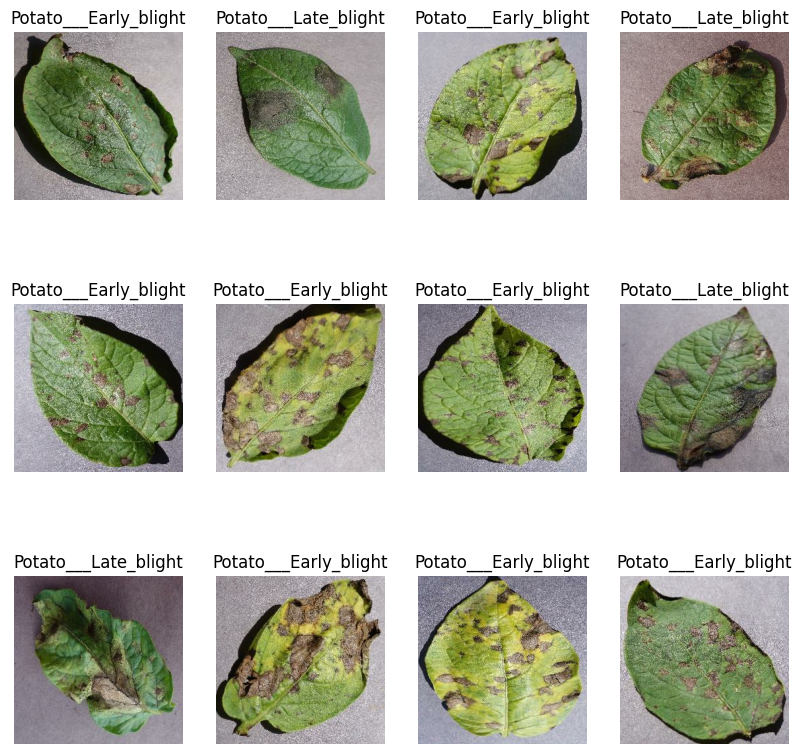

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_split_dataset(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds.shuffle(shuffle_size, seed = 5)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train = ds.take(train_size)
    val = ds.skip(train_size).take(val_size)
    test = ds.skip(train_size).skip(val_size)
    
    return train, val, test

In [8]:
train, val, test = get_split_dataset(dataset)

In [9]:
train = train.cache().prefetch(buffer_size = tf.data.AUTOTUNE).shuffle(1000)
val = val.cache().prefetch(buffer_size = tf.data.AUTOTUNE).shuffle(1000)
test = test.cache().prefetch(buffer_size = tf.data.AUTOTUNE).shuffle(1000)
#cache stores the images in the local memory no need to again and agian read it during every epoch
#prefetch improves performance the cpu reads the file when gpu is performing , in the default cases it does not
#we let TF decide how many images th cpu can prefetch

In [10]:
resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(IMG_SIZE, IMG_SIZE),
     layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2)
])

In [12]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')   
])

model.build(input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS))

/Users/vineetchanne/Desktop/CV PROJECTS/PotatoClassification/PotatoClassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    train,
    epochs = 20,
    validation_data = val,
    verbose = 1,
    batch_size = BATCH_SIZE
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 586ms/step - accuracy: 0.5068 - loss: 0.9311 - val_accuracy: 0.6615 - val_loss: 0.7092
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 592ms/step - accuracy: 0.7399 - loss: 0.6513 - val_accuracy: 0.8177 - val_loss: 0.4364
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 616ms/step - accuracy: 0.8448 - loss: 0.3688 - val_accuracy: 0.8958 - val_loss: 0.2688
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 665ms/step - accuracy: 0.8948 - loss: 0.2519 - val_accuracy: 0.9167 - val_loss: 0.2639
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 641ms/step - accuracy: 0.9152 - loss: 0.2271 - val_accuracy: 0.8854 - val_loss: 0.3639
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 613ms/step - accuracy: 0.9280 - loss: 0.2009 - val_accuracy: 0.9219 - val_loss: 0.2306
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.9249 - loss: 0.2172 - val_accuracy: 0.9219 - val_loss: 0.2277
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 688ms/step - accuracy: 0.9253 - loss: 0.2081 - val_accu

In [16]:
score = model.evaluate(test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9654 - loss: 0.1299


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Vaidation Loss')

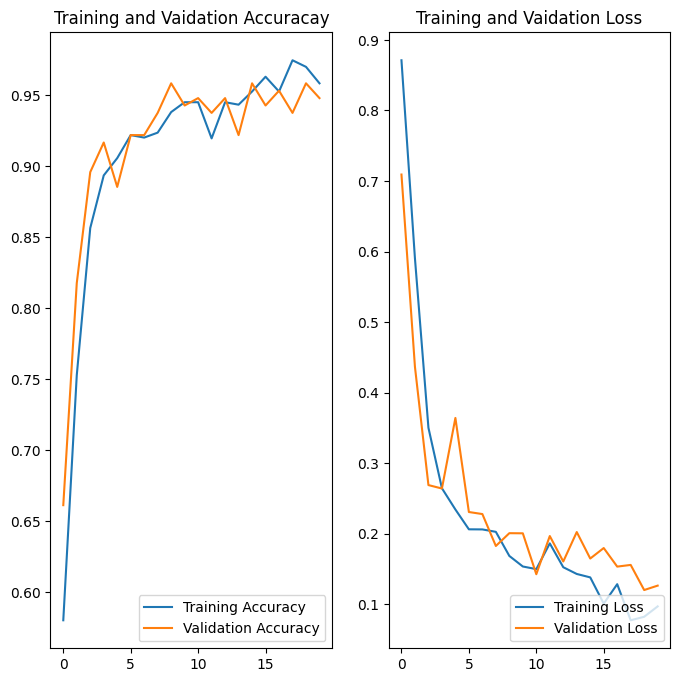

In [18]:

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1) #(row, col, index)
plt.plot(range(20), acc, label = 'Training Accuracy')
plt.plot(range(20), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Vaidation Accuracay")


plt.subplot(1, 2, 2) #(row, col, index)
plt.plot(range(20), loss, label = 'Training Loss')
plt.plot(range(20), val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title("Training and Vaidation Loss")

First Image to predict
First Image's Actual Label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Label :  Potato___Late_blight


2024-10-18 09:34:54.807394: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


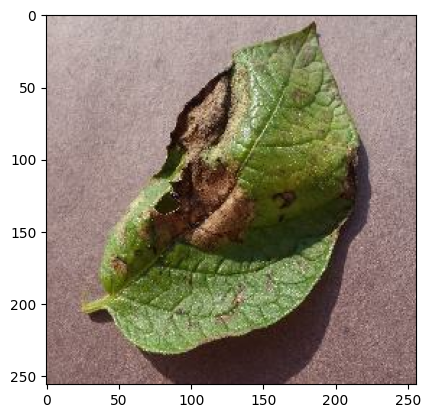

In [19]:
for images_batch, label_batch in test.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("First Image to predict")
    plt.imshow(first_image)
    print("First Image's Actual Label : ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label : ",class_names[np.argmax(batch_prediction[0])])

    # in batch prediction we get three values for each image sinc there were three neurons at the end with
    #softmax activation , hence the one with the maximum values is the label that is predicted, hence
    #np.argmax() gives the index of the maximum values and the we put it inside class_names to get the label

In [20]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


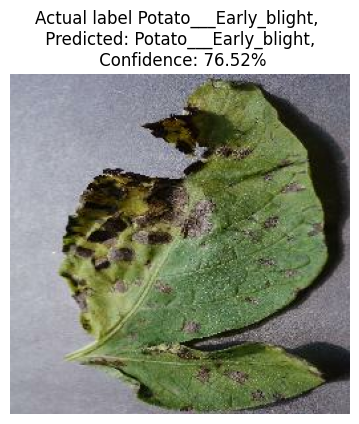

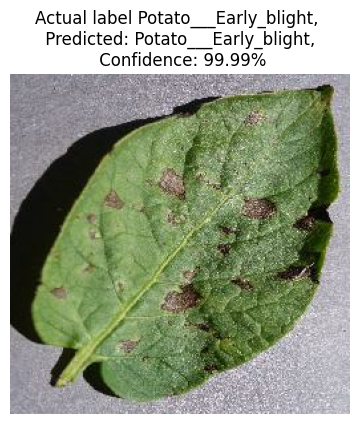

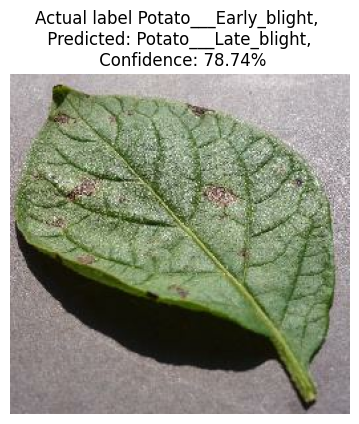

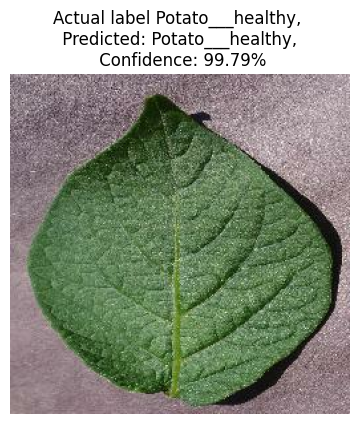

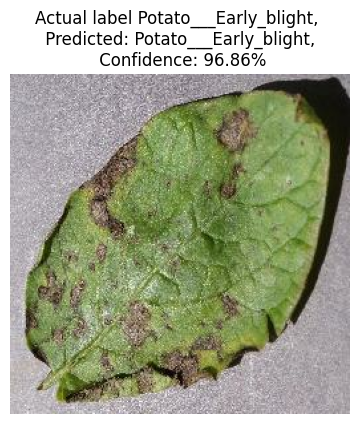

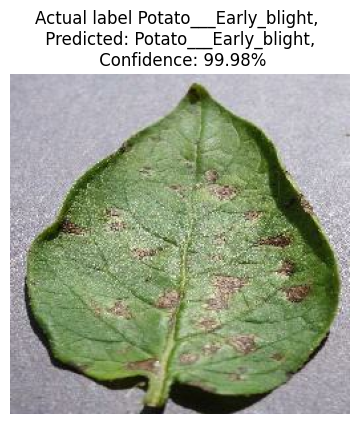

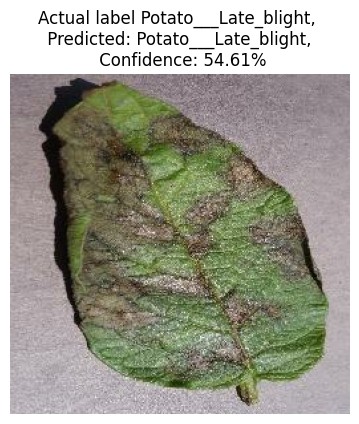

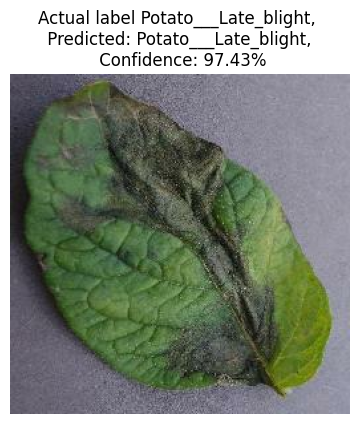

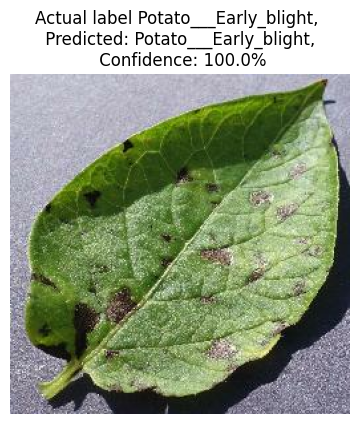

In [21]:
for images, labels in test.take(1):
    for i in range(9):
        plt.figure(figsize = (15,15))
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype(int))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual label {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")

In [24]:
model_version = 1
model.save(f"./models{model_version}.h5")